# KL Divergence

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## KL Div for parametric density modeling

In [3]:
# observed probability density X=[0, 10]; normalized.
# 
obs = np.array([0.001, 0.02, 0.047, 0.12, 0.16, 0.17, 0.14, 0.075, 0.096, 0.0902, 0.0808])
obs /= obs.sum() 
obsProb = obs 
print(obsProb)

[0.001  0.02   0.047  0.12   0.16   0.17   0.14   0.075  0.096  0.0902
 0.0808]


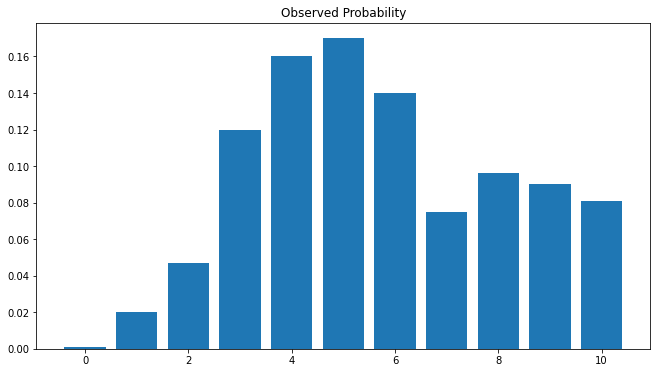

In [4]:
plt.figure(figsize=(11,6))
plt.bar(np.arange(len(obsProb)), obsProb);
plt.title("Observed Probability");

Question: What distribution model would be good for this observed distribution?

Let's model this observed distribution with a binomial distribution with $n=10$ and $\theta = Pr[H]$, where $\theta$ is unknown.

Then KL div provides a distance function with respect to $\theta$ so that we may obtain an optimal $\theta$ for our model.

In [5]:
# Now formulate it and solve it.

In [57]:
k = np.arange(0,11); k
ep = np.dot(k,obsProb); ep

A = ep 
B = 10 - ep 
Ainv = 1/A
Binv = 1/B 
optimal = Binv / (Ainv + Binv)
print(f'The optimal value for theta is {optimal} == ', A/10)

The optimal value for theta is 0.57168 ==  0.57168


<BarContainer object of 11 artists>

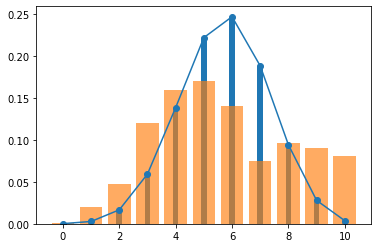

In [7]:
import scipy.stats as stats 
pmf = stats.binom(10, optimal).pmf(k)

plt.bar(k, pmf, width=.2)
plt.plot(pmf, '-o')
plt.bar(k, obsProb, alpha=0.65, );

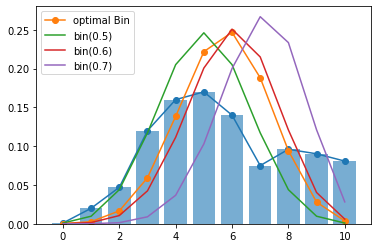

In [8]:
plt.plot(obsProb, '-o');
plt.bar(k, obsProb, alpha=.6);
plt.plot(pmf, '-o', label='optimal Bin');
for th in [0.5, .6, .7]:
    plt.plot(k, stats.binom(10, th).pmf(k), label=f'bin({th})')
plt.legend();

Optimization by Grid search

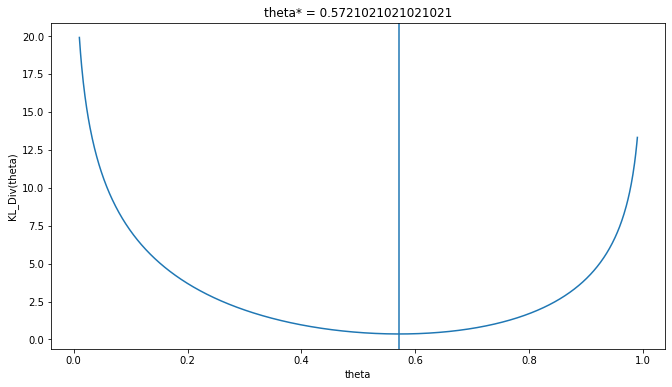

In [25]:
def kldiv(p, q):
    kld = np.dot(p, np.log(p / q))
    return kld 
#
ngrids = 1000
theta_vals = np.linspace(0.01, 0.99, ngrids)
kld_vals = np.empty_like(theta_vals)
for i, th in enumerate(theta_vals):
    q_pmf = stats.binom(10, th).pmf(k)
    kld = kldiv(obsProb, q_pmf)
    kld_vals[i] = kld 
#
theta_optimal = theta_vals[ np.argmin(kld_vals) ]

plt.figure(figsize=(11,6))
plt.plot(theta_vals, kld_vals);
plt.axvline(theta_optimal, ymin=0, ymax=kld_vals.max())
plt.title(f'theta* = {theta_optimal}'); plt.xlabel('theta'); plt.ylabel(f'KL_Div(theta)');

## KL Div of two Gaussians

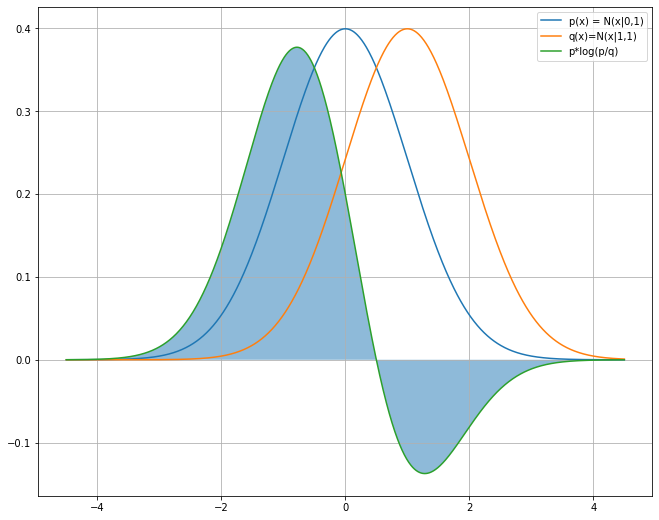

In [10]:
import scipy.stats as stats 
x=np.linspace(-4.5, 4.5, 1000)  # grid points
p = stats.norm(0,1).pdf(x)      # N(0, 1)
q = stats.norm(1,1).pdf(x)      # N(1, 1)

klterm = p * np.log(p/q)        # before integration

plt.figure(figsize=(11,9))
plt.plot(x, p, label="p(x) = N(x|0,1)"); plt.plot(x, q, label="q(x)=N(x|1,1)");
plt.plot(x, klterm, label="p*log(p/q)"); 
plt.fill_between(x, klterm, alpha=.5); plt.legend(); plt.grid(True);

KL div is not symmetric.

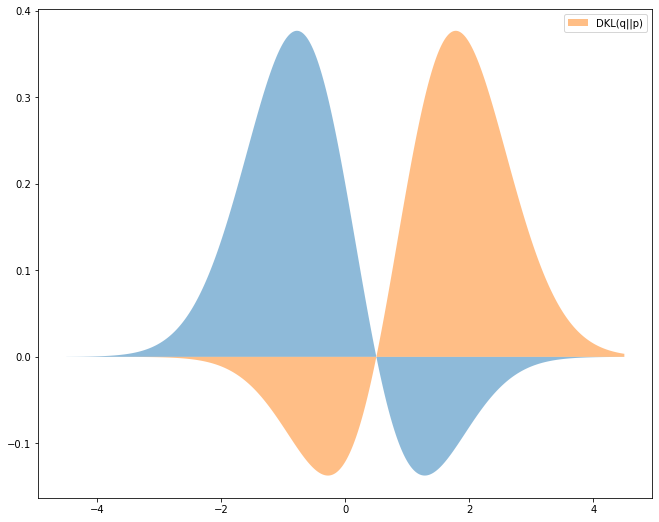

In [11]:
plt.figure(figsize=(11,9))
plt.fill_between(x, klterm, alpha=.5)
klqp = q * np.log(q/p)  # DKL(q||p) \neq DKL(p||q)
plt.fill_between(x, klqp, alpha=.5, label='DKL(q||p)'); plt.legend();

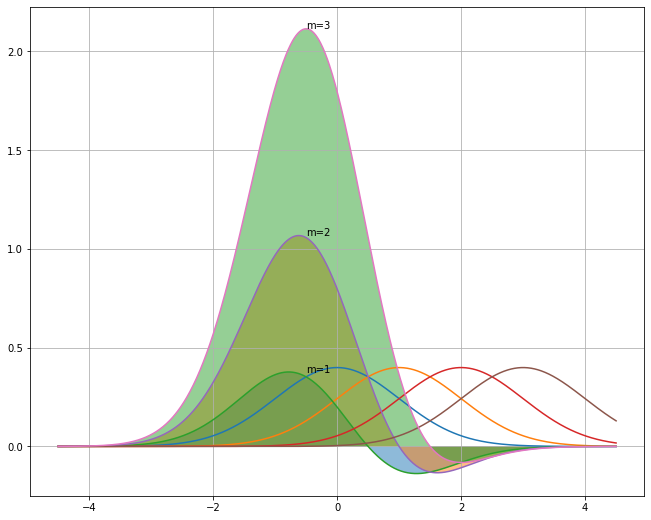

In [12]:
import scipy.stats as stats 
x=np.linspace(-4.5, 4.5, 1000)
means = [1, 2, 3 ] # various mean locations
p = stats.norm(0,1).pdf(x)
plt.figure(figsize=(11,9))
plt.plot(x, p, label="N(0,1)")
for m in means:
    q = stats.norm(m, 1).pdf(x)

    klterm = p * np.log(p/q)

    plt.plot(x, q);
    plt.plot(x, klterm)
    plt.fill_between(x, klterm, alpha=.5)
    plt.text(-.5, klterm.max(), f'm={m}')
plt.grid(True);

End.

## Properties of KL Divergence

$$
    D_{KL}(P||Q) = \mathbb{E}_{x\sim P}\left[ \log\frac{P(x)}{Q(x)} \right] = \int_{x\sim P} P(x) \log\frac{P(x)}{Q(x)} dx
$$

1. Not symmetric:  $D_{KL}(P||Q) \neq D_{KL}(Q||P)$
2. $D_{KL}$ can take on values in $[0, \infty]$.
3. In order for the KL divergence to be finite, the support of $P$ needs to be contained in the support of $Q$.
That is,
- we need
$$
  \{ x | P(x) \neq 0 \} \subset  \{ x | Q(x) \neq 0 \}
    \quad\Leftrightarrow\quad 
      Q(x) \neq 0 \quad\Rightarrow\quad P(x) \neq 0
$$

-  or
$$
P(x) = 0 \quad\Rightarrow\quad Q(x)=0
  \quad\Leftrightarrow\quad 
      \{ x | Q(x) =0 \} \subset  \{ x | P(x) = 0 \}
$$


### Forward / Reverse KL
Let $P$ is a bi-modal Gaussain, and $Q(x|\theta) = Q_\theta$ be a uni-modal Gaussian.

1. Forward KL
    \begin{align}
        arg\min_\theta D_{KL}(P||Q) & = arg\min_\theta\mathbb{E}_{x\sim P}[-\log Q_\theta(X)] - \mathcal{H}(P(X)) \\
            &= arg\min_\theta \mathbb{E}_{x\sim P}[-\log Q_\theta(X)] \\
            &= arg\max_\theta \mathbb{E}_{x\sim P}[\log Q_\theta(X)]
    \end{align}
    - this is equivalent to MLE
      - the data points $x$ are from $P$ and we are optimizing $\theta$ to fit the function $Q_\theta$ to the data set.
    - $Q_\theta$ needs to cover the support of $P(x)$ or the range of $x$'s;
      -  otherwise the cost function gets very low (the last form), since $\log Q(x)=-\infty$ if $Q(x) = 0$ for the support of $P(x)$.
    - mean-seaking behavior. $Q$ needs to cover all the samples from $P$.
  
2. Reverse KL
   \begin{align}
   arg\min_\theta D_{KL}(Q||P) & = arg\min_\theta\mathbb{E}_{x\sim Q_\theta}[-\log P_\theta(X)] - \mathcal{H}(Q_\theta(X)) \\
        & = arg\max_\theta\mathbb{E}_{x\sim Q_\theta}[\log P_\theta(X)] + \mathcal{H}(Q_\theta(X))
   \end{align}
   - Sample points $x$ come from $Q$; $P$ needs to be evaluated at $x$.
   - adjust $\theta$ to 
     - maximize $P(X)$
     - and maximize the entropy of $Q$ as a pdf; the wider (like uniform) the better.
     - mode-seeking behavior; where we have many samples (or high probability of $Q$), $P$ must be high.

References
- Bishop's book
- Murphy's book
- https://dibyaghosh.com/blog/probability/kldivergence.html

### Computation Example
$$
    p(x) = 0.4 \mathcal{N}(x|-2, 1) + 0.6 \mathcal{N}(x|2,1)
$$
$$
    q(x|\mu, \sigma) = \mathcal{N}(x|\mu, \sigma^2)
$$

1. Forward KL
   1. Find a parametric form of $D_{KL}(p||q)$
   2. Search for $\theta^*$
   3. plot $q$ and $p$
2. Reverse KL 
   1. Find a parametric form of $D_{KL}(q||p)$
   2. Search for $\theta^*$
   3. plot $q$ and $p$


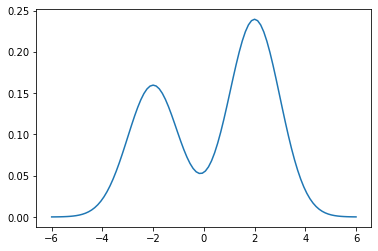

In [55]:
x = np.linspace(-6, 6, 100)
pi = 0.4, 0.6
mus = [-2, 2]
sigmas = [1, 1]

P = pi[0] * stats.norm(mus[0], sigmas[0]).pdf(x) + pi[1] * stats.norm(mus[1], sigmas[1]).pdf(x)

plt.plot(x, P);